In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [23]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = (15, 2)

## Load the dataset

In [5]:
(X_train, y_train),(X_test, y_test) = keras.datasets.cifar10.load_data()

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [13]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

We have to flatten the 2D y_train into 1D array to make the class print better without any issues

In [19]:
y_train = y_train.reshape(-1)

In [20]:
def plot_image(index):
    plt.imshow(X_train[index])
    print(classes[y_train[index]])
    plt.axis('off')

ship


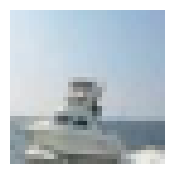

In [21]:
plot_image(100)

bird


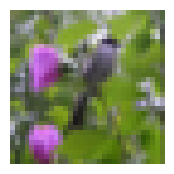

In [22]:
plot_image(300)

## Data Normalization

In [29]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [27]:
X_train_scaled = X_train/255 
X_test_scaled = X_test/255 

In [30]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

## Build the model - ANN


In [24]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000,))

In [37]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    
    keras.layers.Dense( 128, activation='relu'),
    keras.layers.Dense( 128, activation='relu'),
    keras.layers.Dense( 64, activation='relu'),
    
    keras.layers.Dense( 10, activation='softmax'),
])

model.compile(
    optimizer = "Adam",
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [38]:
model.fit(X_train_scaled, y_train, epochs = 10, batch_size = 100)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2501 - loss: 2.0288
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3675 - loss: 1.7426
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4084 - loss: 1.6499
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4390 - loss: 1.5647
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4529 - loss: 1.5389
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4631 - loss: 1.4983
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4794 - loss: 1.4648
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4841 - loss: 1.4394
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4881 - loss: 1.4277
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4935 - loss: 1.4110


In [39]:
loss, acc = model.evaluate(X_test_scaled, y_test)
acc * 100

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4737 - loss: 1.4603


47.45999872684479

In [40]:
pred = model.predict(X_test_scaled)

y_pred = [np.argmax(value) for value in pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [42]:
from sklearn.metrics import classification_report, confusion_matrix

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.56      0.51      0.53      1000
           1       0.50      0.71      0.59      1000
           2       0.39      0.28      0.33      1000
           3       0.31      0.45      0.37      1000
           4       0.55      0.25      0.35      1000
           5       0.42      0.32      0.36      1000
           6       0.48      0.56      0.52      1000
           7       0.51      0.56      0.53      1000
           8       0.56      0.62      0.59      1000
           9       0.54      0.48      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.47     10000
weighted avg       0.48      0.47      0.47     10000



<Axes: >

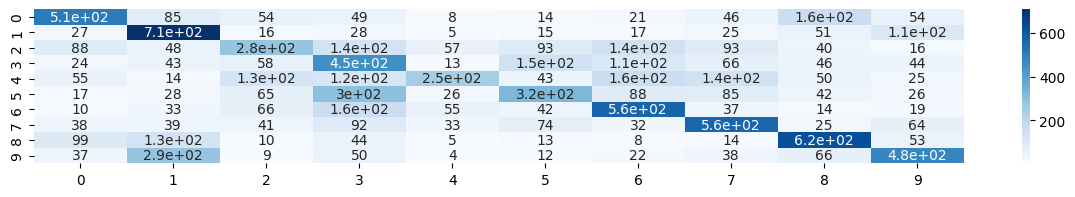

In [43]:
sns.heatmap(cm, cmap="Blues", annot = True)